In [1]:
%matplotlib inline
from __future__ import print_function, division, unicode_literals
import os, sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gp
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.basemap import Basemap
import shapely.ops
from descartes import PolygonPatch
from pygaarst import raster
import brewer2mpl
import seaborn as sns
import configs

In [2]:
sys.path.append(os.path.join(os.path.expanduser('~'),
    "Dropbox/Research/satelliteremotesensing/firedetection/"))
import viirstools as vt

In [3]:
productdir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/visual/figures//"
basedir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/'

In [4]:
configs.FIREPARAM

{'boundary': {'colbarpos': [0.125, 0.2, 0.725, 0.025],
  'figdim': (15, 19),
  'filedir': '2004Boundary',
  'firename': 'boundary',
  'fireyear': 2004,
  'infix': '_CLIP',
  'sceneid': 'EO1H0690142004201110PX'},
 'crazy': {'colbarpos': [0.125, 0.2, 0.725, 0.025],
  'figdim': (15, 19),
  'filedir': '2004Crazy',
  'firename': 'crazy',
  'fireyear': 2004,
  'infix': '_CLIP',
  'sceneid': 'EO1H0680132004192110KY'},
 'woodriver': {'colbarpos': [0.125, 0.125, 0.74, 0.02],
  'figdim': (15, 25),
  'filedir': '2009WoodRiver',
  'firename': 'woodriver',
  'fireyear': 2009,
  'infix': '_CLIP',
  'sceneid': 'EO1H0690142009214110KF'}}

In [5]:
gisbasedir = "/Volumes/SCIENCE_mobile_Mac/GENERAL_GIS/"
sideroads = os.path.join(gisbasedir, "matsugov.us/rds/rds_latlon")
mainroads = os.path.join(gisbasedir, 'catalog.data.gov/tl_2013_02_prisecroads/tl_2013_02_prisecroads')

In [6]:
font = {'family' : 'Corbel',
        'weight' : 'bold',
        'size'   : 24}

mpl.rc('font', **font)

bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors
mpl.rcParams['axes.color_cycle'] = colors

/Users/cwaigl/anaconda2/envs/snakes/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
def draw_poly_on_map(lats, lons, m, ax):
    x, y = m(lons, lats)
    xy = zip(x, y)
    poly = Polygon(xy, facecolor='maroon', edgecolor='k', hatch='//', linewidth=3, alpha=.5, zorder=10)
    ax.add_patch(poly)

Now GIS data

In [8]:
fireperimDF = gp.GeoDataFrame.from_file(
    os.path.join(
        gisbasedir, 
        "AKLargeFiresDB",
        "PerimSince1940",
        "FireAreaHistory.shp"))


DEBUG:Fiona:GDAL_DATA: /Users/cwaigl/anaconda2/envs/snakes/etc/conda/activate.d/../../../share/gdal
DEBUG:Fiona:PROJ_LIB: /Users/cwaigl/anaconda2/envs/snakes/share/proj
DEBUG:Fiona:Got coordinate system
DEBUG:Fiona:Index: 0
DEBUG:Fiona:Got coordinate system
DEBUG:fiona.collection:Flushed buffer
DEBUG:fiona.collection:Stopped session


In [9]:
namelist2004 = ['Crazy', 'Boundary']

In [10]:
fireselection = fireperimDF[
    ((fireperimDF.FireName.isin(namelist2004)) & (fireperimDF.FireYear == '2004')) |
    ((fireperimDF.FireName.str.startswith('Wood')) & (fireperimDF.FireYear == '2009'))].geometry

In [11]:
SAVEFIG = False
sns.set_context("talk", font_scale=1.8)

earth = 'linen'
water = 'lightskyblue'
rivercolor = water
lakecolor = water
oceancolor = water
continentcolor = earth
meridianrange = np.arange(-180, 180, 2)
meridianlabels = [False, False, False, 1]
parallelrange = np.arange(0, 80, 1)
parallellabels = [1, False, False, False]
facecolor = 'orange'
alpha = 0.7

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=195304.327954,1565361.82026,453265.04881,1816635.30212&bboxSR=3338&imageSR=3338&size=1500,1461&dpi=96&format=png32&f=image


INFO:root:The value 2004 201 21:02:11 couldn't be parsed as int, float, date, time, datetime. Returning it as string.
INFO:root:The value 2004 201 21:03:21 couldn't be parsed as int, float, date, time, datetime. Returning it as string.
INFO:root:The value 2009 214 20:40:37 couldn't be parsed as int, float, date, time, datetime. Returning it as string.
INFO:root:The value 2009 214 20:44:55 couldn't be parsed as int, float, date, time, datetime. Returning it as string.
INFO:root:The value 2004 192 21:07:57 couldn't be parsed as int, float, date, time, datetime. Returning it as string.
INFO:root:The value 2004 192 21:09:12 couldn't be parsed as int, float, date, time, datetime. Returning it as string.


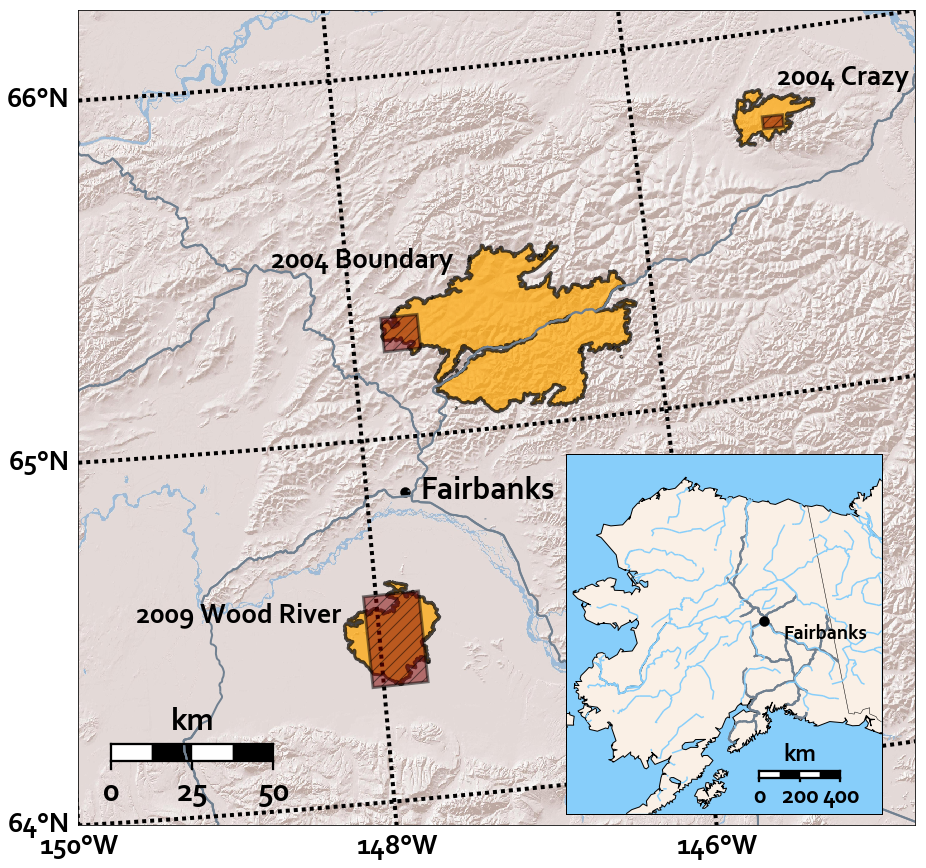

In [13]:
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.grid(False) 
mm = Basemap(
    resolution='l',
    llcrnrlon=-150,llcrnrlat=64,
    urcrnrlon=-144,urcrnrlat=66,
    lat_0=65, lon_0=150,
    epsg=3338,
    projection='aea'
)
mm.arcgisimage(
    server='http://server.arcgisonline.com/ArcGIS', 
    service='World_Shaded_Relief',
    xpixels = 1500, verbose= True)
#mm.drawcoastlines()
mm.drawmeridians(meridianrange, labels=meridianlabels, linewidth=4)
mm.drawparallels(parallelrange, labels=parallellabels, linewidth=4)
#mm.drawcountries(linewidth=2, color="darkgrey", zorder=10)
#mm.drawmapboundary(linewidth=2)
x, y = mm(-147.75, 64.85)
mm.scatter(x, y, c='k', s=100)
x, y = mm(-147.65, 64.85)
plt.text(x, y, 'Fairbanks',fontsize=32,fontweight='bold',
                    ha='left',va='center',color='k',)
mm.readshapefile(
    mainroads, 
    'roads', 
    color="slategrey", linewidth=2)
for firename in configs.FIREPARAM:
    hypsc = raster.Hyperionscene(
        os.path.join(
            basedir, 
            configs.FIREPARAM[firename]['filedir'],
            configs.FIREPARAM[firename]['sceneid']))
    hypsc.infix = '_clip'
    testband = hypsc.band1
    latbounds = [testband.Lat[0, 0], testband.Lat[-1, 0], testband.Lat[-1, -1], testband.Lat[0, -1]]
    lonbounds = [testband.Lon[0, 0], testband.Lon[-1, 0], testband.Lon[-1, -1], testband.Lon[0, -1]]
    draw_poly_on_map(latbounds, lonbounds, mm, ax1)
x2, y2 = mm(-145, 65.85)        
plt.text(x2, y2, '2004 Crazy', fontweight='bold')
x2, y2 = mm(-148.5, 65.5)        
plt.text(x2, y2, '2004 Boundary',fontweight='bold')
x2, y2 = mm(-149.55, 64.55)        
plt.text(x2, y2, '2009 Wood River',fontweight='bold')
patches = []
for poly in fireselection.to_crs(epsg=4326).geometry.values:
    transpoly = shapely.ops.transform(mm, poly)
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(transpoly, facecolor=facecolor, alpha=alpha, linewidth=3)
        patches.append(p)
    elif poly.geom_type == 'MultiPolygon':
        for single in transpoly:
            p = PolygonPatch(single, facecolor=facecolor, 
                             linewidth=3, alpha=alpha)
            patches.append(p)
ax1.add_collection(PatchCollection(patches, match_original=True))
mm.drawmapscale(-149.25, 64.18, -149.25, 64.18, 50, barstyle='fancy', fontsize=32)

# Inset map: All of AK with Fairbanks marked
newmap = inset_axes(ax1,
                    width=5, 
                    height=5,
                    loc=4)
newmap.set_xticklabels([])
newmap.grid(False) 
map2 = Basemap(
    resolution='l',
    llcrnrlon=-165,llcrnrlat=56,
    urcrnrlon=-130,urcrnrlat=71,
    lat_0=65, lon_0=150,
    epsg=3338,
    projection='aea'
)
map2.drawcountries()
map2.fillcontinents(color=earth,lake_color=lakecolor)
map2.drawrivers(color=rivercolor, linewidth=1.5, zorder=5)
map2.drawmapboundary(fill_color=oceancolor)
map2.drawcoastlines()
x, y = map2(-147.75, 64.85)
map2.scatter(x, y, c='k', s=100, zorder=10 )
x, y = map2(-146., 64.)
newmap.text(x, y, 'Fairbanks', fontsize=20, fontweight='bold', zorder=11)
map2.readshapefile(
    mainroads, 
    'roads', 
    color="slategrey", linewidth=2)

map2.drawmapscale(-146, 58, -146, 58, 400, barstyle='fancy', fontsize=24)

In [14]:
outfn = 'Fig01_LR.pdf'
fig1.savefig(os.path.join(productdir, outfn), dpi=150, bb_inches='tight', pad_inches=0.0)

In [15]:
outfn = 'Fig01_LR.jpg'
fig1.savefig(os.path.join(productdir, outfn), dpi=150, bb_inches='tight', pad_inches=0.0)

In [16]:
outfn = 'Fig01.pdf'
fig1.savefig(os.path.join(productdir, outfn), dpi=300, bb_inches='tight')